In [45]:
from IPython.core.display import display, HTML, Javascript

color_map = ['#FFFFFF','#FF5733']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, 
                                            main_color,  main_color, prompt, main_color, main_color, 
                                            main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

In [1]:
%pip install ultralytics

     ---------------------------------------- 0.0/40.4 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.4 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.4 kB 330.3 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/40.4 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 40.4/40.4 kB 277.1 kB/s eta 0:00:00
  Using cached PyYAML-6.0.1-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/750.8 kB ? eta -:--:--
   ---- ----------------------------------- 81.9/750.8 kB 4.5 MB/s eta 0:00:01
   ------ --------------------------------- 112.6/750.

In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

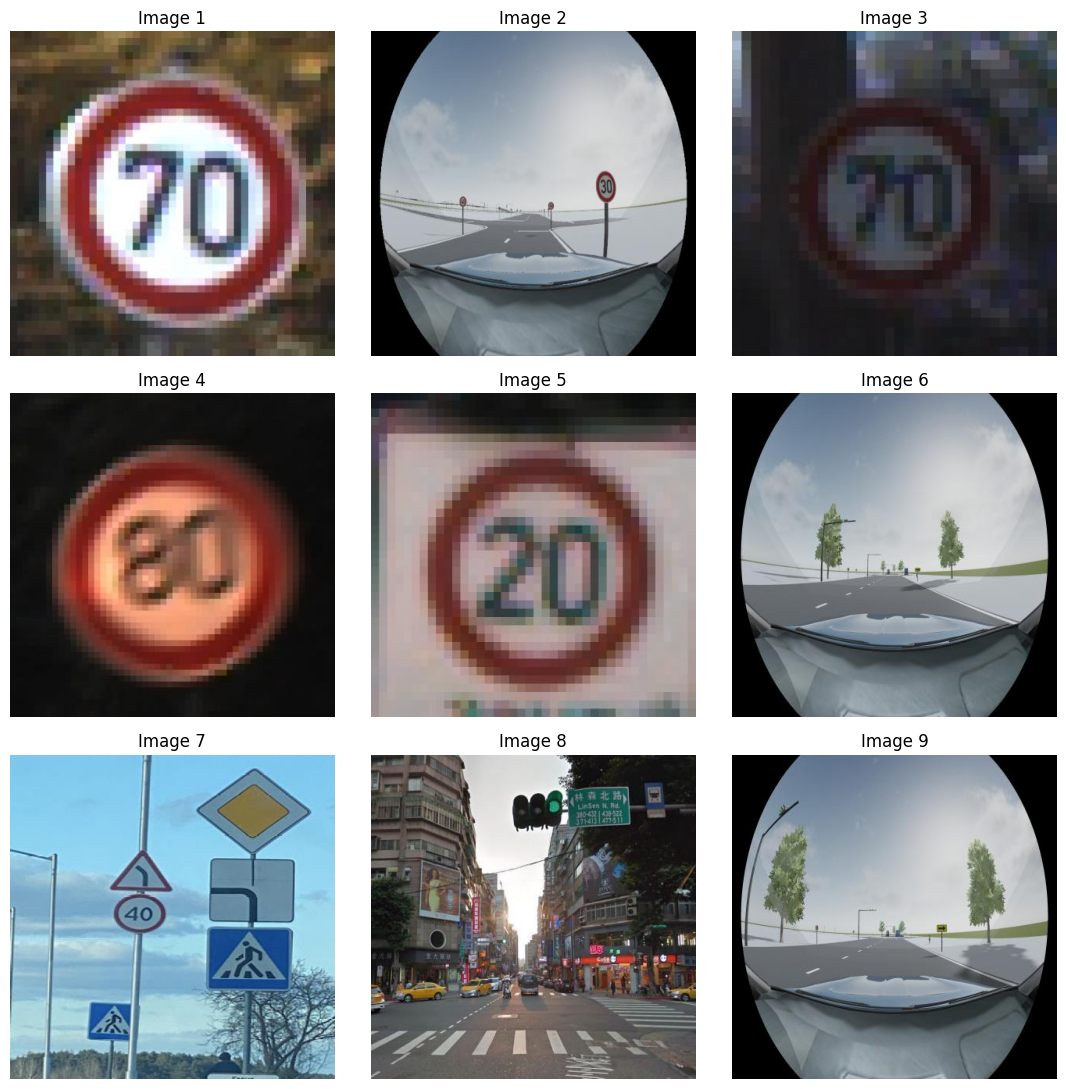

In [4]:
import os
import random
import matplotlib.pyplot as plt

Image_dir = r'C:\Users\HONOR\OneDrive\Desktop\Object detection\train\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [6]:
import cv2

# Get the size of the image
image = cv2.imread(r"C:\Users\HONOR\OneDrive\Desktop\Object detection\train\images\00000_00000_00007_png.rf.a57de5d1a4e7ac7afa168838fec08c3a.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")


The image has dimensions 416x416 and 3 channels.



image 1/1 C:\Users\HONOR\OneDrive\Desktop\Object detection\train\images\00001_00030_00005_png.rf.ffdae2af318eebb9d2b4b3a18dded057.jpg: 416x416 (no detections), 197.0ms
Speed: 5.0ms preprocess, 197.0ms inference, 7.0ms postprocess per image at shape (1, 3, 416, 416)


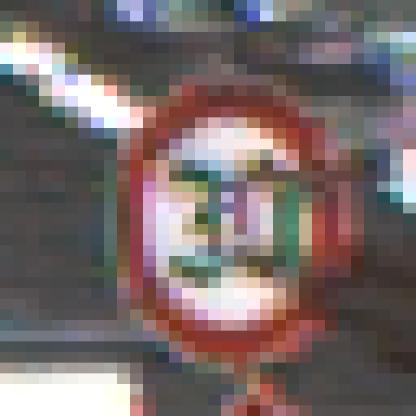

In [25]:
from ultralytics import YOLO

# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = r"C:\Users\HONOR\OneDrive\Desktop\Object detection\train\images\00001_00030_00005_png.rf.ffdae2af318eebb9d2b4b3a18dded057.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [1]:
from ultralytics import YOLO

# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

# Training The Final Model
try:
    Result_Final_model = Final_model.train(data=r"C:\Users\HONOR\OneDrive\Desktop\Object detection\data.yaml",
                                           epochs=10, imgsz=416, batch=16, lr0=0.0001, dropout=0.15, device='cpu')
except Exception as e:
    print(f"An error occurred during training: {e}")

Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.2.5 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.2  Python-3.12.3 torch-2.2.2+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:\Users\HONOR\OneDrive\Desktop\Object detection\data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fals

train: Scanning C:\Users\HONOR\OneDrive\Desktop\Object detection\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]
val: Scanning C:\Users\HONOR\OneDrive\Desktop\Object detection\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to c:\Users\HONOR\runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to c:\Users\HONOR\runs\detect\train15
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7808      3.292       1.03         16        416: 100%|██████████| 221/221 [21:46<00:00,  5.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:12<00:00,  5.11s/it]

                   all        801        944      0.191      0.444       0.25        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.7078      2.375     0.9558         12        416: 100%|██████████| 221/221 [21:55<00:00,  5.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:59<00:00,  4.60s/it]

                   all        801        944      0.394      0.453      0.426      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      0.687      1.935     0.9453         11        416: 100%|██████████| 221/221 [21:20<00:00,  5.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:22<00:00,  5.48s/it]

                   all        801        944      0.598      0.534      0.582      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.6745      1.575     0.9365         10        416: 100%|██████████| 221/221 [26:04<00:00,  7.08s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:57<00:00,  4.53s/it]

                   all        801        944      0.699      0.627      0.682      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.6382       1.27     0.9227         11        416: 100%|██████████| 221/221 [23:14<00:00,  6.31s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:02<00:00,  4.70s/it]

                   all        801        944      0.789      0.702       0.78      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.6077      1.085     0.9028         10        416: 100%|██████████| 221/221 [20:22<00:00,  5.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:00<00:00,  4.65s/it]

                   all        801        944      0.797      0.762      0.826      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.5967     0.9557     0.8954         14        416: 100%|██████████| 221/221 [22:38<00:00,  6.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:00<00:00,  4.64s/it]

                   all        801        944      0.879      0.752      0.835      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.5717     0.8594     0.8924         12        416: 100%|██████████| 221/221 [20:58<00:00,  5.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:07<00:00,  4.91s/it]

                   all        801        944      0.877      0.802      0.861       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.5531     0.7649     0.8836         12        416: 100%|██████████| 221/221 [20:37<00:00,  5.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:00<00:00,  4.63s/it]

                   all        801        944      0.916      0.776      0.868      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.5373     0.7194     0.8776         12        416: 100%|██████████| 221/221 [20:29<00:00,  5.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:03<00:00,  4.75s/it]

                   all        801        944       0.91      0.808      0.876      0.766



10 epochs completed in 4.010 hours.
Optimizer stripped from c:\Users\HONOR\runs\detect\train15\weights\last.pt, 6.2MB
Optimizer stripped from c:\Users\HONOR\runs\detect\train15\weights\best.pt, 6.2MB

Validating c:\Users\HONOR\runs\detect\train15\weights\best.pt...
Ultralytics YOLOv8.2.2  Python-3.12.3 torch-2.2.2+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:50<00:00,  4.27s/it]


                   all        801        944       0.91      0.808      0.876      0.766
           Green Light        801        122      0.829      0.555      0.646      0.391
             Red Light        801        108      0.739      0.556      0.644      0.398
       Speed Limit 100        801         52       0.94      0.904      0.943      0.865
       Speed Limit 110        801         17      0.864      0.751      0.855      0.808
       Speed Limit 120        801         60      0.946      0.872      0.976      0.896
        Speed Limit 20        801         56          1      0.906      0.969      0.836
        Speed Limit 30        801         74      0.928      0.946       0.96      0.892
        Speed Limit 40        801         55      0.905      0.891      0.939      0.811
        Speed Limit 50        801         71      0.983      0.794      0.902      0.811
        Speed Limit 60        801         76       0.95      0.789      0.902      0.822
        Speed Limit 7

In [2]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

In [3]:
%matplotlib inline

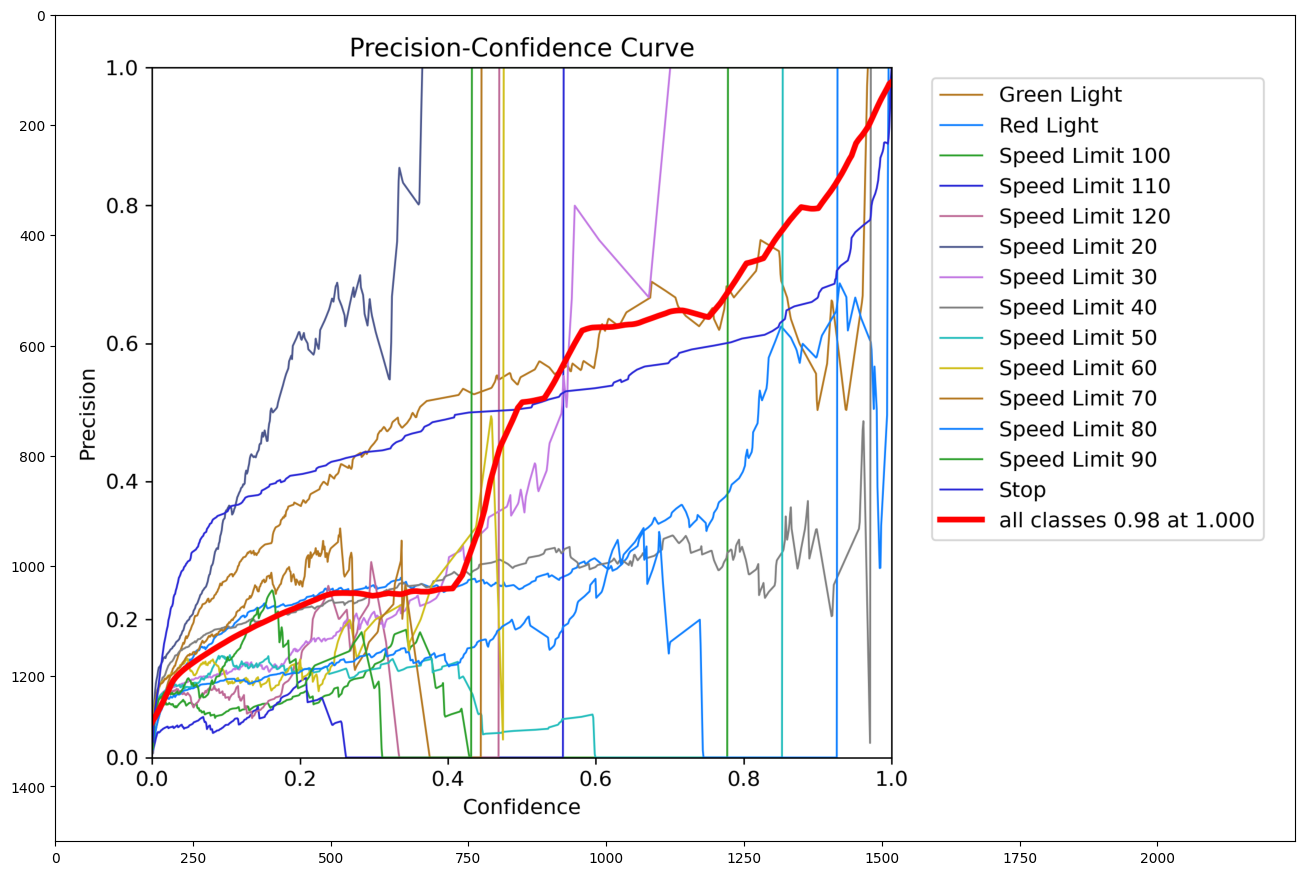

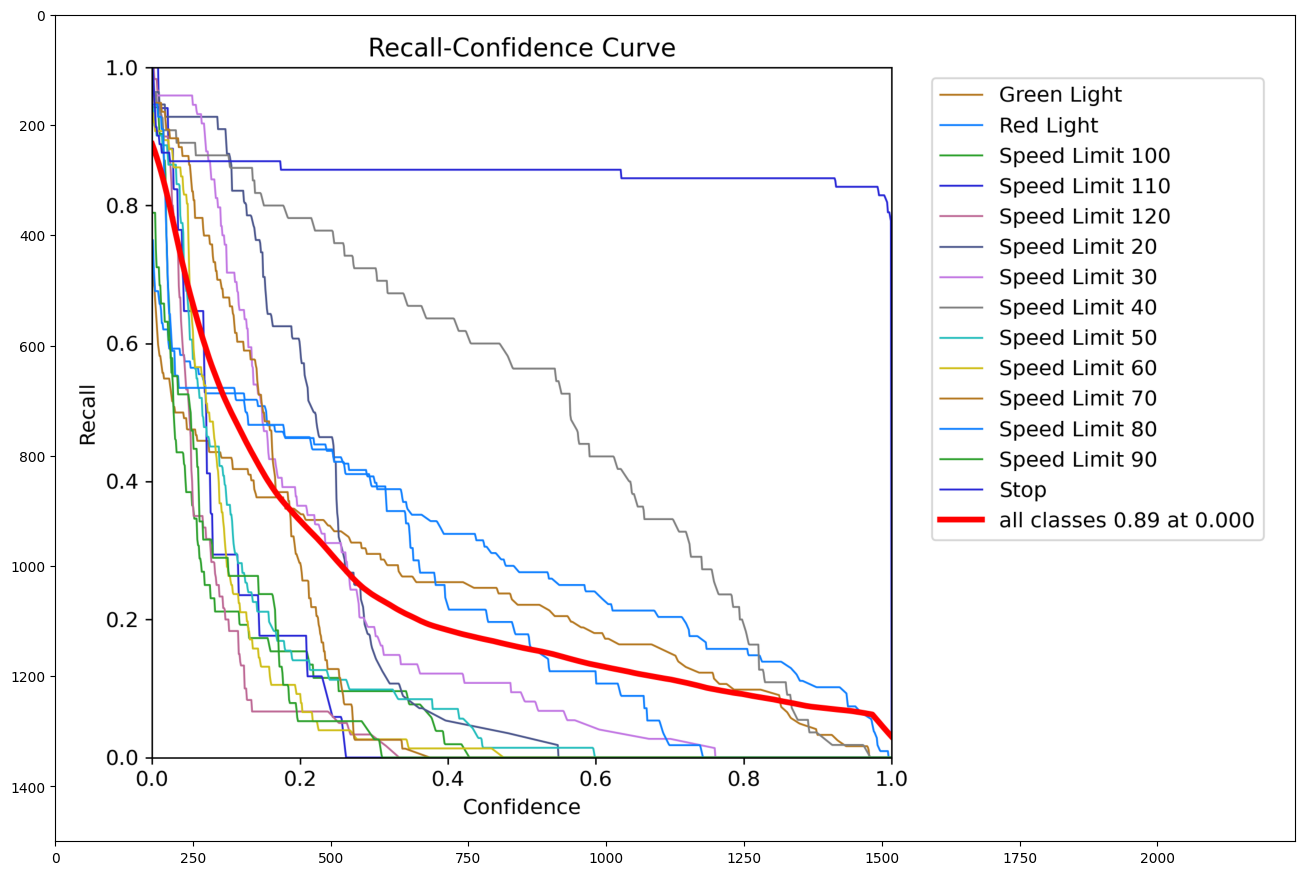

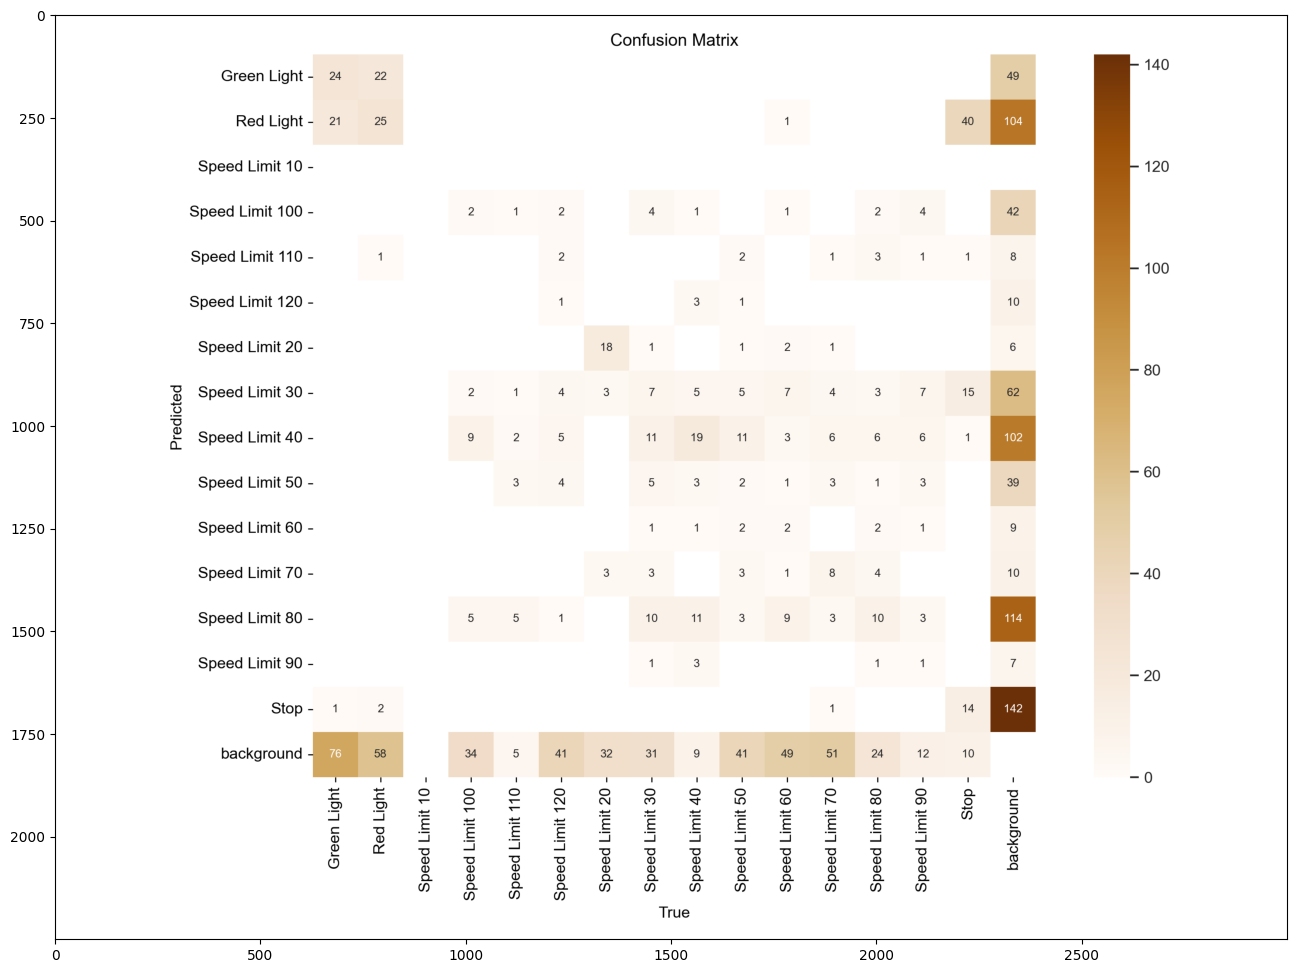

In [4]:
import cv2
import matplotlib.pyplot as plt

# Assuming list_of_metrics is defined somewhere before this code snippet
list_of_metrics = ["P_curve.png", "R_curve.png", "confusion_matrix.png"]

for i in list_of_metrics:
    # Construct the file path using f-string
    image = cv2.imread(f'C:\\Users\\HONOR\\OneDrive\\Desktop\\Object detection\\runs\\detect\\train6\\{i}')

    # Check if image is loaded successfully
    if image is None:
        print(f'Error: Unable to load image {i}')
    else:
        # Create a larger figure
        plt.figure(figsize=(16, 12))

        # Display the image
        plt.imshow(image)

        # Show the plot
        plt.show()


In [5]:
import pandas as pd

Result_Final_model = pd.read_csv(r'C:\Users\HONOR\OneDrive\Desktop\Object detection\runs\detect\train6\results.csv')
Result_Final_model.tail(10)

epoch        train/box_loss        train/cls_loss  \
0                     1               0.92245                3.3393   
1                     2               0.80528                2.6378   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.1162               0.16032               0.46971   
1                1.0480               0.19779               0.40677   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.17866               0.13142               0.91951   
1               0.24433               0.19705               0.79151   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                3.4197                1.0536              0.000175   
1                2.9307                0.9667              0.000177   

                 lr/pg1                lr/pg2  
0              0.000175              0.000175  
1              0.000177              0.000177

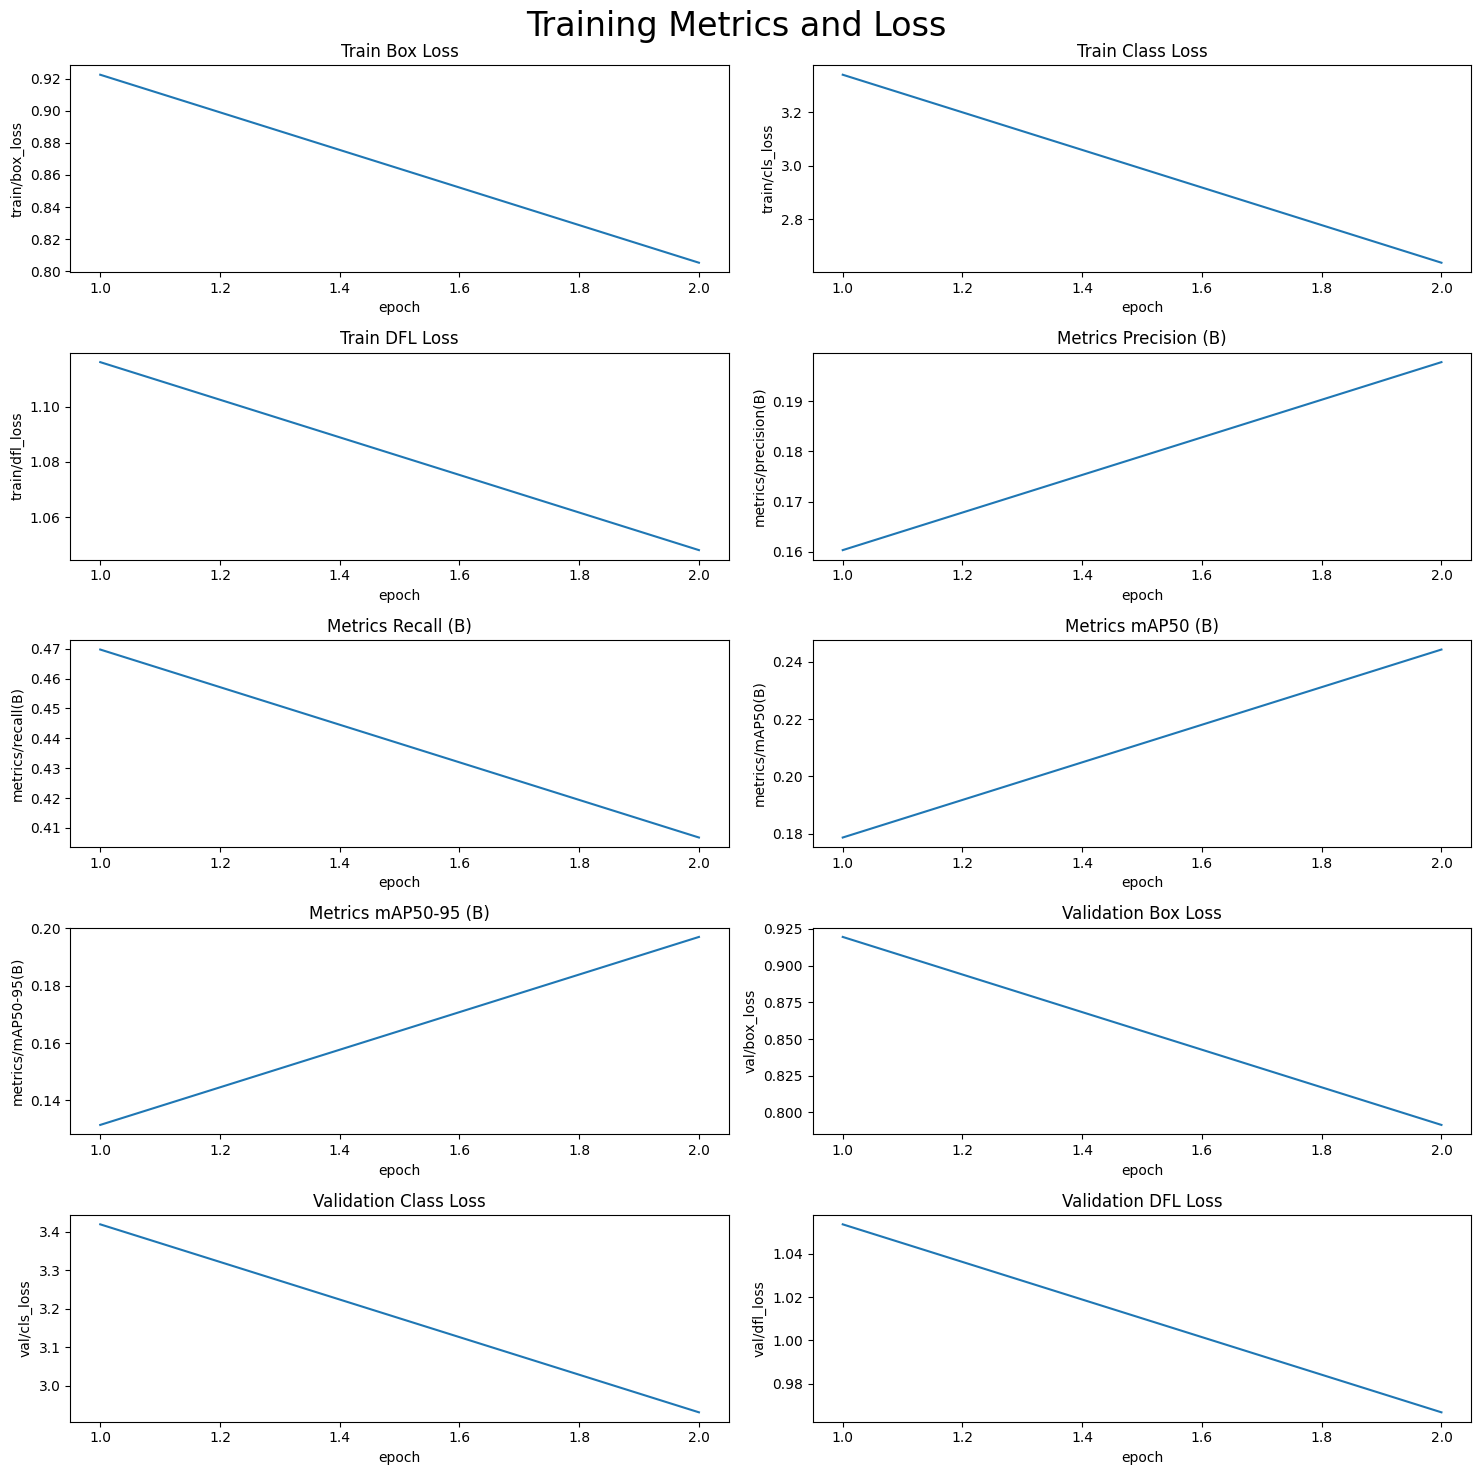

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set column names without whitespace
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# Set the main title
plt.suptitle('Training Metrics and Loss', fontsize=24)

# Adjust layout and show plot
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()


In [7]:
# Loading the best performing model
Valid_model = YOLO(r'C:\Users\HONOR\OneDrive\Desktop\Object detection\runs\detect\train6\weights\best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.2.2  Python-3.12.3 torch-2.2.2+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\HONOR\OneDrive\Desktop\Object detection\test\labels.cache... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [01:27<00:00,  2.20s/it]


                   all        638        770      0.253      0.397       0.23      0.186
           Green Light        638        110      0.367      0.373      0.264      0.164
             Red Light        638         94       0.21      0.351      0.183     0.0964
        Speed Limit 10        638          3          1          0      0.171     0.0888
       Speed Limit 100        638         46      0.126       0.37      0.114     0.0968
       Speed Limit 110        638         21     0.0404     0.0952      0.063     0.0527
       Speed Limit 120        638         44     0.0871      0.136      0.134      0.111
        Speed Limit 20        638         46      0.483       0.63      0.517      0.457
        Speed Limit 30        638         60      0.114      0.433      0.138      0.125
        Speed Limit 40        638         53      0.186      0.811      0.279      0.224
        Speed Limit 50        638         50      0.133      0.267      0.107     0.0883
        Speed Limit 6

In [8]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.2530576639600351
metrics/recall(B):  0.39741641065393124
metrics/mAP50(B):  0.23036974222855242
metrics/mAP50-95(B):  0.18598851199714692


In [9]:
import os
import random
import cv2

# Path to the directory containing the images
image_dir = r'C:\Users\HONOR\OneDrive\Desktop\Object detection\test\images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)



0: 416x416 1 Green Light, 176.0ms
Speed: 5.0ms preprocess, 176.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to c:\Users\HONOR\runs\detect\train152

0: 416x416 1 Green Light, 118.0ms
Speed: 2.0ms preprocess, 118.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to c:\Users\HONOR\runs\detect\train153

0: 416x416 1 Red Light, 139.0ms
Speed: 2.0ms preprocess, 139.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to c:\Users\HONOR\runs\detect\train154

0: 416x416 1 Red Light, 130.0ms
Speed: 1.0ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to c:\Users\HONOR\runs\detect\train155

0: 416x416 1 Speed Limit 30, 116.0ms
Speed: 1.0ms preprocess, 116.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to c:\Users\HONOR\runs\detect\train156

0: 416x416 1 Speed Limit 40, 124.0ms
Speed: 1.0ms preprocess, 124.0ms 

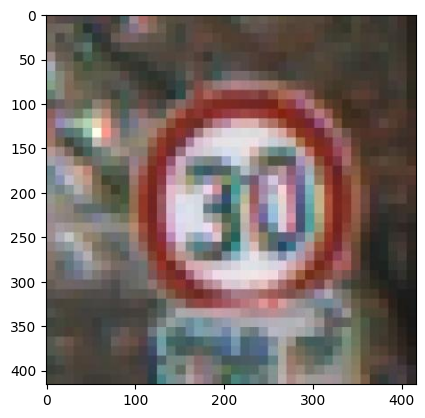

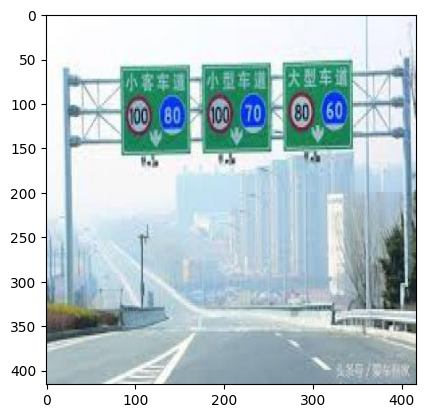

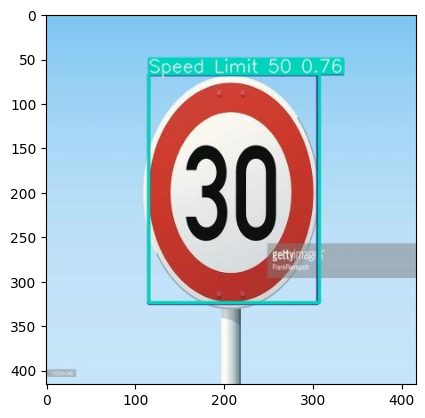

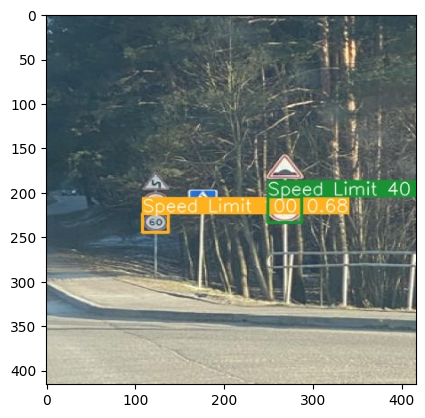

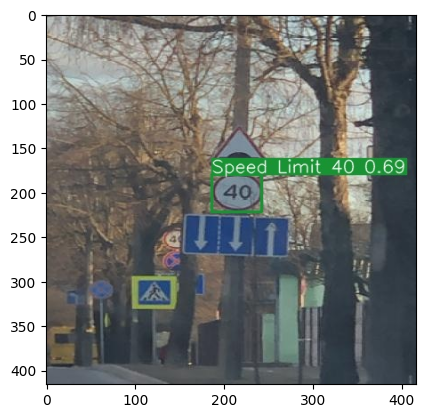

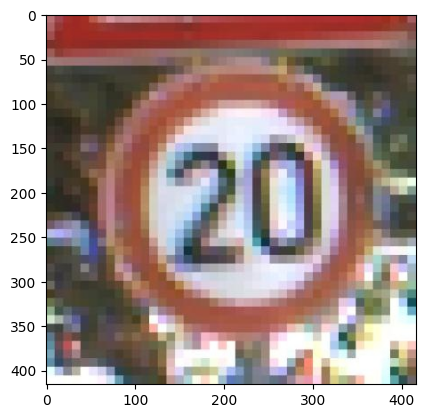

In [10]:
for i in range(62, 68):
    image_path = f'C:/Users/HONOR/OneDrive/Desktop/Object detection/runs/detect/train{i}/image0.jpg'
    plt.imshow(plt.imread(image_path))
    plt.show()


In [11]:
from ultralytics import YOLO

# Load or initialize your video model
video_model = YOLO()  # Example initialization, replace with your actual video model initialization

# Export the model to ONNX format
video_model.export(format='onnx')


Ultralytics YOLOv8.2.2  Python-3.12.3 torch-2.2.2+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success  1.7s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (4.3s)
Results saved to C:\Users\HONOR\OneDrive\Desktop\Object detection
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'

In [12]:
import cv2
import numpy as np
import onnxruntime as ort
from tqdm import tqdm

# Load ONNX model
ort_session = ort.InferenceSession("yolov8n.onnx")

# Open video file
video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define output video writer
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Process each frame
for _ in tqdm(range(total_frames)):
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the frame
    # (Replace this with your actual inference code)
    input_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_image = np.expand_dims(r'C:\Users\HONOR\OneDrive\Desktop\Object detection\train\images', axis=0)
    output = ort_session.run(None, {"input": r'C:\Users\HONOR\OneDrive\Desktop\Object detection\train\images'})  # Replace "input" with your model input name

    # Overlay results on frame
    # (Replace this with your actual visualization code)
    processed_frame = frame  # Placeholder for processed frame

    # Write processed frame to output video
    out.write(processed_frame)

# Release resources
cap.release()
out.release()


0it [00:00, ?it/s]


In [13]:
# Import the Video object
from IPython.display import Video

# Process the video using FFmpeg
!ffmpeg -y -loglevel panic -i C:\Users\HONOR\OneDrive\Desktop\Object detection\video.mp4 output.mp4

# Display the video
Video("output.mp4", width=960, embed=True)


'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
# Load a pr-trained model
video_model = YOLO("yolov8n.pt")
 
# Use the model to detect signs
video_model.predict(source="C:\\Users\\HONOR\\OneDrive\\Desktop\\Object detection\\output.mp4", show=True, save=True)

FileNotFoundError: Failed to open video C:\Users\HONOR\OneDrive\Desktop\Object detection\output.mp4